In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

#### Prepare for Dataset

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

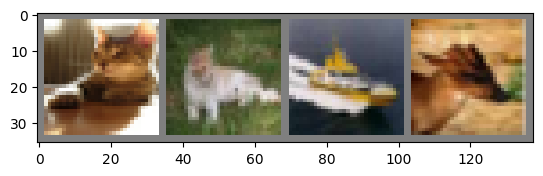

  cat   cat  ship  deer


In [ ]:
# The function to show an image.
def imshow(img):
    img = img / 2 + 0.5     # Unnormalize.
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get some random training images.
dataiter = iter(trainloader)
images, labels = next(dataiter)
# Show images.
imshow(torchvision.utils.make_grid(images))
# Print labels.
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

#### Choose a Device

In [ ]:
# If there are GPUs, choose the first one for computing. Otherwise use CPU.
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
# If 'cuda:0' is printed, it means GPU is available.

cpu


#### Network Definition

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        ###### Fill the blank here ######
        self.flatten = nn.Flatten()
        self.conv1 = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size = 5, stride = 1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            #nn.Dropout2d(0.25),
            nn.MaxPool2d(3, 2)
        )

        self.conv2 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size = 5, stride = 1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            #nn.Dropout2d(0.25),
            nn.MaxPool2d(2, 2)
        )

        self.conv3 = nn.Sequential(
            nn.Conv2d(128, 256, kernel_size = 3, stride = 1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(256),
            #nn.Dropout2d(0.25),
            nn.MaxPool2d(2, 2)
        )


        self.linear_relu_stack = nn.Sequential(
            nn.Linear(256 * 3 * 3, 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, 10)

        )

    def forward(self, x):
        ###### Fill the blank here ######
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

net = Net()     # Create the network instance.
net.to(device)  # Move the network parameters to the specified device.

Net(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv3): Sequential(
    (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=2304, out

#### Optimizer and Loss Function

In [ ]:
# We use cross-entropy as loss function.
loss_func = nn.CrossEntropyLoss()

opt = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

#### Training Procedure

In [ ]:
avg_losses = []   # Avg. losses.
epochs = 10       # Total epochs.
print_freq = 1000  # Print frequency.

for epoch in range(epochs):  # Loop over the dataset multiple times.
    running_loss = 0.0       # Initialize running loss.
    for i, data in enumerate(trainloader, 0):
        # Get the inputs.
        inputs, labels = data

        # Move the inputs to the specified device.
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the parameter gradients.
        opt.zero_grad()

        # Forward step.
        outputs = net(inputs)
        loss = loss_func(outputs, labels)

        # Backward step.
        loss.backward()

        # Optimization step (update the parameters).
        opt.step()

        # Print statistics.
        running_loss += loss.item()
        if i % print_freq == print_freq - 1: # Print every several mini-batches.
            avg_loss = running_loss / print_freq
            print('[epoch: {}, i: {:5d}] avg mini-batch loss: {:.3f}'.format(
                epoch, i, avg_loss))
            avg_losses.append(avg_loss)
            running_loss = 0.0

print('Finished Training.')

[epoch: 0, i:   999] avg mini-batch loss: 2.026
[epoch: 0, i:  1999] avg mini-batch loss: 1.852
[epoch: 0, i:  2999] avg mini-batch loss: 1.720
[epoch: 0, i:  3999] avg mini-batch loss: 1.740
[epoch: 0, i:  4999] avg mini-batch loss: 1.635
[epoch: 0, i:  5999] avg mini-batch loss: 1.582
[epoch: 0, i:  6999] avg mini-batch loss: 1.552
[epoch: 0, i:  7999] avg mini-batch loss: 1.481
[epoch: 0, i:  8999] avg mini-batch loss: 1.474
[epoch: 0, i:  9999] avg mini-batch loss: 1.433
[epoch: 0, i: 10999] avg mini-batch loss: 1.438
[epoch: 0, i: 11999] avg mini-batch loss: 1.423
[epoch: 1, i:   999] avg mini-batch loss: 1.356
[epoch: 1, i:  1999] avg mini-batch loss: 1.297
[epoch: 1, i:  2999] avg mini-batch loss: 1.324
[epoch: 1, i:  3999] avg mini-batch loss: 1.310
[epoch: 1, i:  4999] avg mini-batch loss: 1.259
[epoch: 1, i:  5999] avg mini-batch loss: 1.277
[epoch: 1, i:  6999] avg mini-batch loss: 1.231
[epoch: 1, i:  7999] avg mini-batch loss: 1.214
[epoch: 1, i:  8999] avg mini-batch loss

#### Training Loss Curve

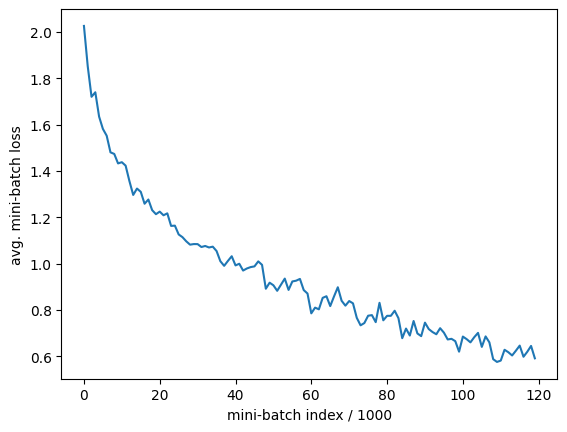

In [ ]:
plt.plot(avg_losses)
plt.xlabel('mini-batch index / {}'.format(print_freq))
plt.ylabel('avg. mini-batch loss')
plt.show()

#### Evaluate on Test Dataset

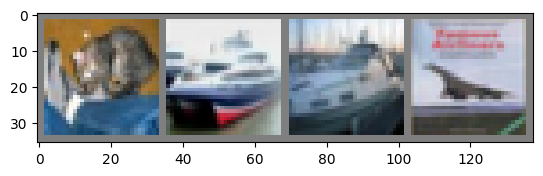

GroundTruth:    cat  ship  ship plane
Predicted:    cat   car truck plane


In [ ]:
# Check several images.
dataiter = iter(testloader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))
outputs = net(images.to(device))
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

In [ ]:
# Get test accuracy.
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 73 %


In [ ]:
# Get test accuracy for each class.
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 82 %
Accuracy of   car : 85 %
Accuracy of  bird : 56 %
Accuracy of   cat : 55 %
Accuracy of  deer : 72 %
Accuracy of   dog : 60 %
Accuracy of  frog : 75 %
Accuracy of horse : 79 %
Accuracy of  ship : 79 %
Accuracy of truck : 77 %
